In [1]:
import sys
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install ramp-workflow
!{sys.executable} -m pip install ramp-utils
!{sys.executable} -m pip install pot

### Problem.py

## Getting started with the RAMP starting kit

# Software prerequisites

This starting kit requires the following dependencies:
*   numpy
*   matplotlib
*   seaborn
*   pandas
*   scikit-learn







In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import problem
sns.set()

# Data exploration
### Loading the data
We start by loading the train data


In [3]:
df, y = problem.get_train_data()
df['subscribed'] = y
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,54,services,married,unknown,no,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
1,40,admin.,married,high.school,no,yes,yes,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
2,33,services,married,high.school,no,no,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,1
3,33,technician,single,university.degree,no,yes,no,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0
4,55,technician,married,basic.6y,no,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Exploratory Data Analysis

In [ ]:
df.shape

(27595, 21)

In [ ]:
# Get unique count for each variable
df.nunique()

age                 76
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1423
campaign            39
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          312
nr.employed         11
subscribed           2
dtype: int64

In [ ]:
#Examen de la colonne target
df['subscribed'].value_counts(normalize=True)

no     0.887951
yes    0.112049
Name: subscribed, dtype: float64

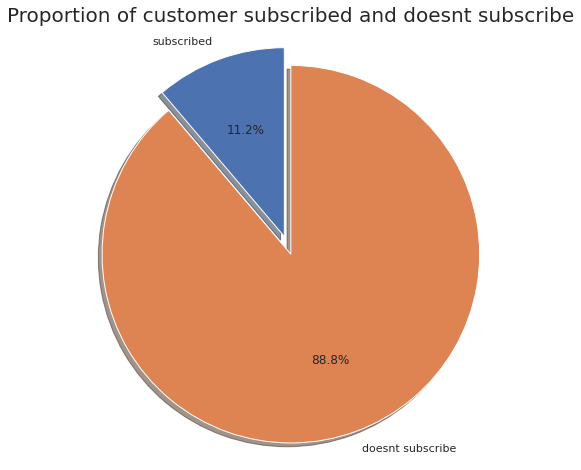

In [ ]:
labels = 'subscribed', 'doesnt subscribe'
sizes = [df.subscribed[df['subscribed']=='yes'].count(), df.subscribed[df['subscribed']=='no'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer subscribed and doesnt subscribe", size = 20)
plt.show()


In [ ]:
for col in df.columns:
  print(f'{col :-<50}{df[col].unique()}')

age-----------------------------------------------[35 54 45 38 51 82 40 47 80 27 28 41 29 57 36 33 48 30 31 52 44 24 25 55
 34 56 21 26 32 39 43 58 46 37 49 73 50 42 62 64 67 53 75 59 63 76 70 79
 60 20 18 22 61 72 71 19 23 68 77 78 83 65 74 66 81 98 84 69 85 92 95 88
 91 86 17 87]
job-----------------------------------------------['admin.' 'retired' 'technician' 'services' 'self-employed' 'blue-collar'
 'management' 'entrepreneur' 'student' 'housemaid' 'unemployed' 'unknown']
marital-------------------------------------------['married' 'divorced' 'single' 'unknown']
education-----------------------------------------['high.school' 'basic.4y' 'professional.course' 'unknown' 'basic.9y'
 'basic.6y' 'university.degree' 'illiterate']
default-------------------------------------------['no' 'unknown' 'yes']
housing-------------------------------------------['yes' 'no' 'unknown']
loan----------------------------------------------['no' 'yes' 'unknown']
contact-----------------------------------

In [ ]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [ ]:
df = df.replace('unknown', np.nan)
df = df.replace('nonexistent', np.nan)


In [ ]:
for col in df.columns:
  print(f'{col :-<50}{df[col].unique()}')

age-----------------------------------------------[35 54 45 38 51 82 40 47 80 27 28 41 29 57 36 33 48 30 31 52 44 24 25 55
 34 56 21 26 32 39 43 58 46 37 49 73 50 42 62 64 67 53 75 59 63 76 70 79
 60 20 18 22 61 72 71 19 23 68 77 78 83 65 74 66 81 98 84 69 85 92 95 88
 91 86 17 87]
job-----------------------------------------------['admin.' 'retired' 'technician' 'services' 'self-employed' 'blue-collar'
 'management' 'entrepreneur' 'student' 'housemaid' 'unemployed' nan]
marital-------------------------------------------['married' 'divorced' 'single' nan]
education-----------------------------------------['high.school' 'basic.4y' 'professional.course' nan 'basic.9y' 'basic.6y'
 'university.degree' 'illiterate']
default-------------------------------------------['no' nan 'yes']
housing-------------------------------------------['yes' 'no' nan]
loan----------------------------------------------['no' 'yes' nan]
contact-------------------------------------------['cellular' 'telephone']
mon

In [ ]:
df.isna().sum() / len(df)

age               0.000000
job               0.007538
marital           0.002174
education         0.041638
default           0.209748
housing           0.023555
loan              0.023555
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.863019
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
subscribed        0.000000
dtype: float64

In [ ]:
#Selecting only the numerical columns
numerical_df = df.select_dtypes(include=['float64','int64'])

# Categorical Features DF
# Object Features
categorical_df = df.select_dtypes(include=['object']).drop(['subscribed'], axis = 1)

In [ ]:
# Printing Numerical Columns
print("We have", numerical_df.columns.size,"numerical columns")
print ("{: ^100s}".format("The numerical columns names"))
print ("{: ^100s}".format("--------------------"))
print (', '.join(list(numerical_df.columns)))

# Printing Categorical Columns
print("\n\nWe have", categorical_df.columns.size,"categorical columns")
print ("{: ^100s}".format("The categorical columns names"))
print ("{: ^100s}".format("--------------------"))
print (', '.join(list(categorical_df.columns)))

We have 10 numerical columns
                                    The numerical columns names                                     
                                        --------------------                                        
age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed


We have 10 categorical columns
                                   The categorical columns names                                    
                                        --------------------                                        
job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome


### Descriptive statistics

Relation Target/variable

In [ ]:
subscribed_df = df[df['subscribed'] == 'yes']
no_subscribed_df = df[df['subscribed'] == 'no']

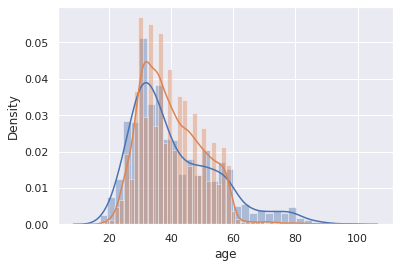

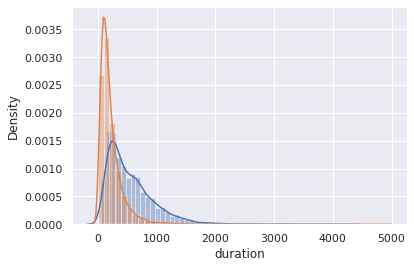

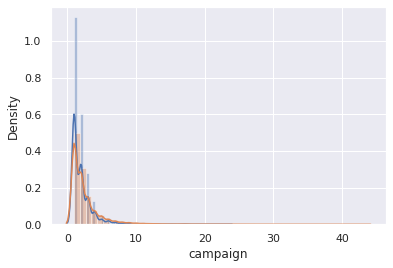

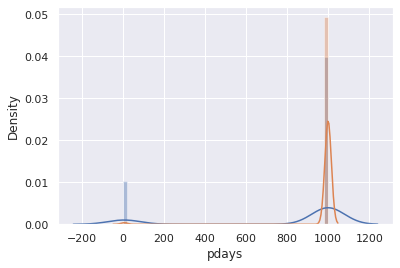

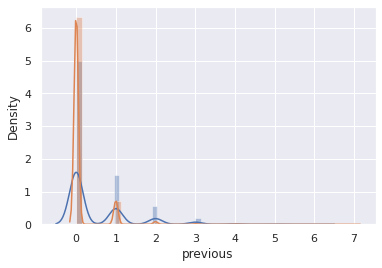

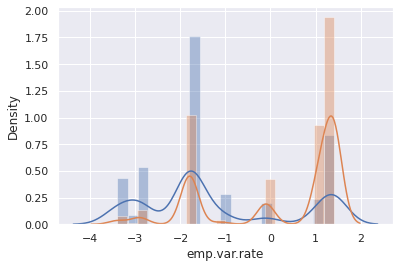

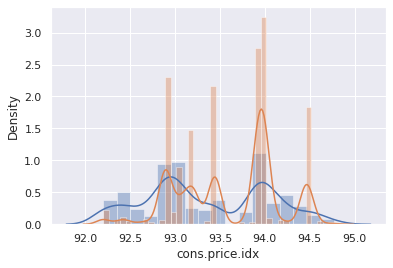

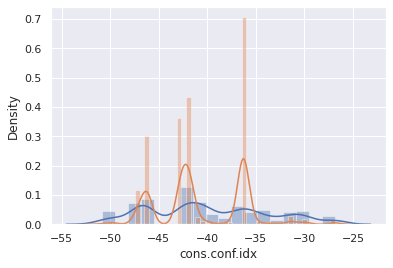

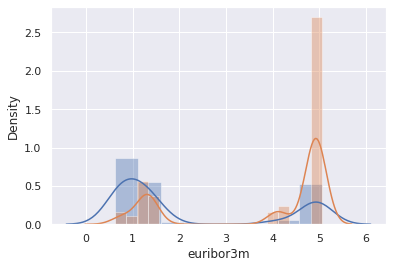

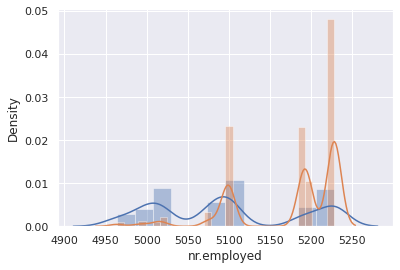

In [ ]:
for col in numerical_df.columns:
  plt.figure()
  sns.distplot(subscribed_df[col], label='subscribed')
  sns.distplot(no_subscribed_df[col], label='doesnt subscribe')

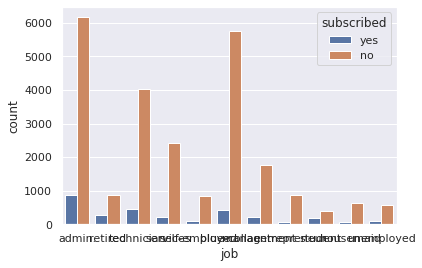

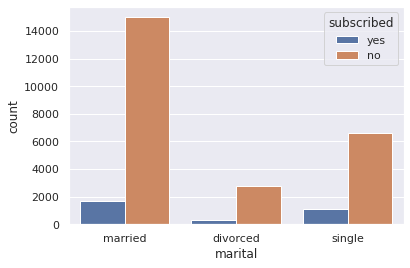

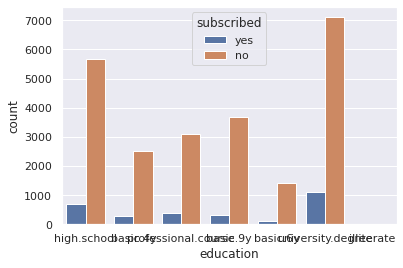

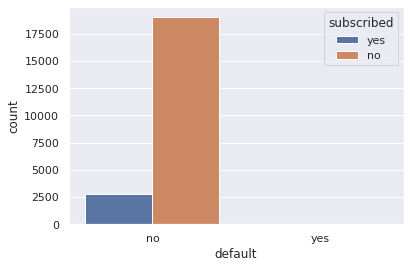

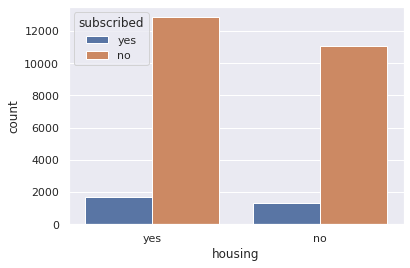

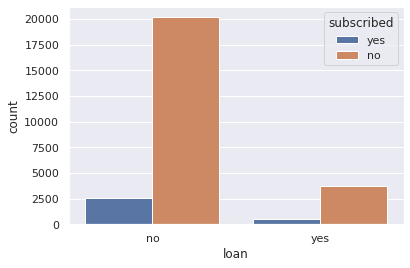

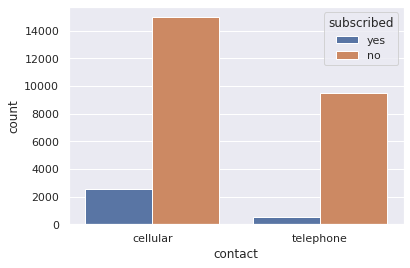

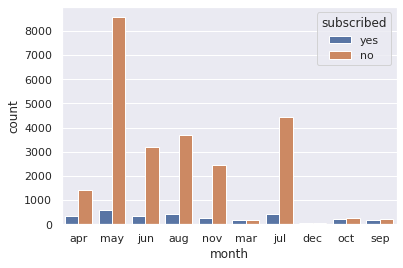

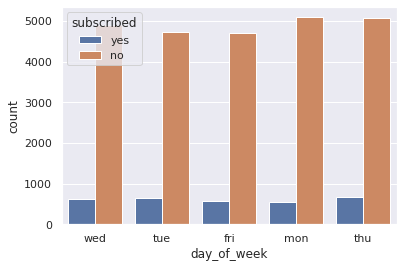

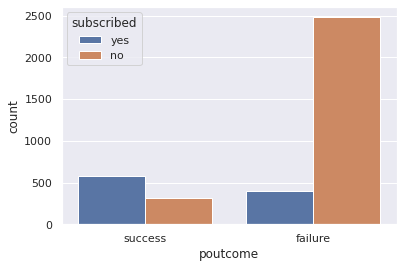

In [ ]:
# We first review the 'Status' relation with categorical variables

for col in categorical_df.columns:
    plt.figure()
    sns.countplot(x=col, hue = 'subscribed',data = df)
    

Target

In [ ]:
df['subscribed'] = df['subscribed'].replace('no', 0)
df['subscribed'] = df['subscribed'].replace('yes', 1)

In [ ]:
#statistics about 'subscribed'
df['subscribed'].describe()

count    27595.000000
mean         0.112049
std          0.315433
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: subscribed, dtype: float64

In [ ]:
corr_mat = df.corr()

In [ ]:
corr_mat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
age,1.000000,0.004842,0.002167,-0.037508,0.032145,-0.003281,0.003344,0.126727,0.005315,-0.024755,0.034566
duration,0.004842,1.000000,-0.072848,-0.047240,0.016649,-0.026900,0.007199,-0.004193,-0.031664,-0.044341,0.404671
campaign,0.002167,-0.072848,1.000000,0.049861,-0.076178,0.148494,0.125314,-0.013800,0.132985,0.141528,-0.069452
pdays,-0.037508,-0.047240,0.049861,1.000000,-0.583967,0.269505,0.077775,-0.092200,0.294230,0.369697,-0.321757
previous,0.032145,0.016649,-0.076178,-0.583967,1.000000,-0.422074,-0.206038,-0.056154,-0.454447,-0.498729,0.223566
emp.var.rate,-0.003281,-0.026900,0.148494,0.269505,-0.422074,1.000000,0.773093,0.198170,0.972448,0.906705,-0.295248
cons.price.idx,0.003344,0.007199,0.125314,0.077775,-0.206038,0.773093,1.000000,0.057737,0.685361,0.517888,-0.133728
cons.conf.idx,0.126727,-0.004193,-0.013800,-0.092200,-0.056154,0.198170,0.057737,1.000000,0.279769,0.104227,0.055747
euribor3m,0.005315,-0.031664,0.132985,0.294230,-0.454447,0.972448,0.685361,0.279769,1.000000,0.945099,-0.304259
nr.employed,-0.024755,-0.044341,0.141528,0.369697,-0.498729,0.906705,0.517888,0.104227,0.945099,1.000000,-0.351188


Text(0.5, 1.0, 'Heatmap for the correlation matrix between numerical features ')

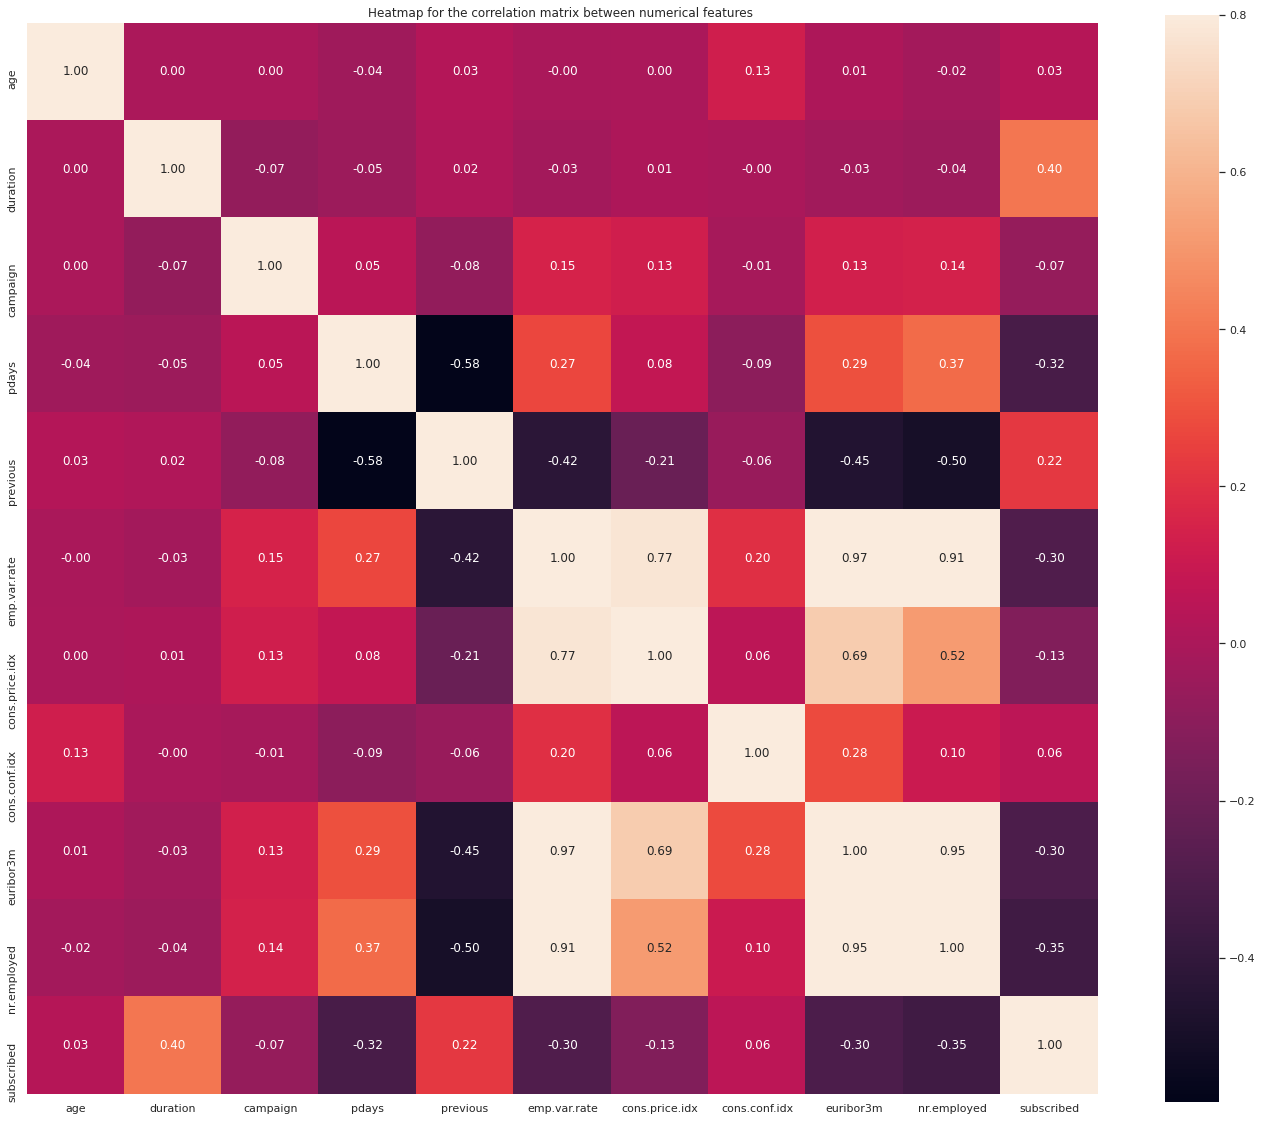

In [ ]:
corr_mat = df.corr()
imp = corr_mat ['subscribed']> 0.5 

f, ax = plt.subplots(figsize = (24,20))
sns.heatmap(corr_mat, annot=True, fmt='.2f', vmax = 0.8, square=True) #cmap='Blues'
ax.set_title('Heatmap for the correlation matrix between numerical features ')

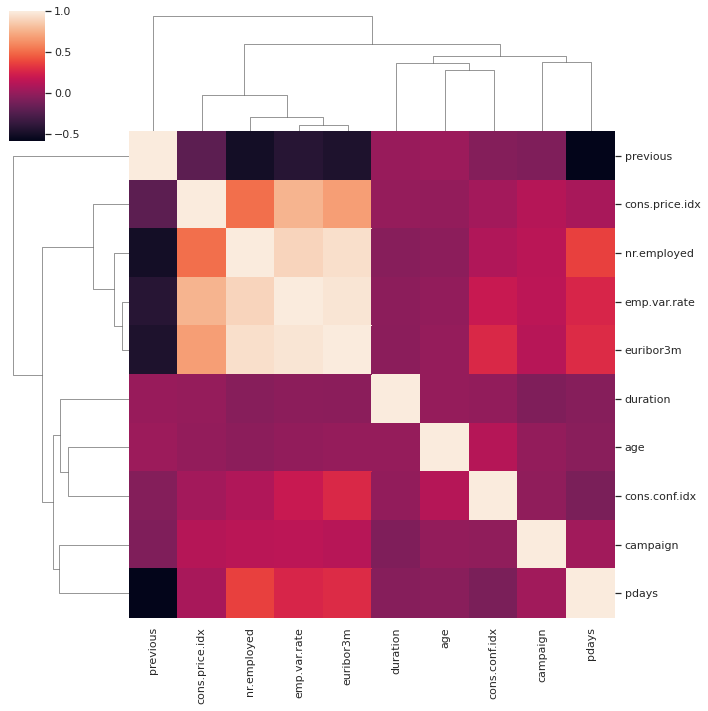

In [ ]:
sns.clustermap(numerical_df.corr())

# Workflow
## Feature Extractor

définir un workflow
faire un modèle
implémenter une métrique qui prend en compte
l'imbalance